# Counterfeit Medicines Sales Prediction

### Importing Libraries and the dataset

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



train=pd.read_csv(r"C:\Users\anvay\Downloads\counterfeit_train.csv")
test=pd.read_csv(r"C:\Users\anvay\Downloads\counterfeit_test.csv")

In [7]:
train.dtypes

Medicine_ID             object
Counterfeit_Weight     float64
DistArea_ID             object
Active_Since             int64
Medicine_MRP           float64
Medicine_Type           object
SidEffect_Level         object
Availability_rating    float64
Area_Type               object
Area_City_Type          object
Area_dist_level         object
Counterfeit_Sales      float64
dtype: object

In [8]:
train.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'Counterfeit_Sales'],
      dtype='object')

C:\Users\anvay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Counterfeit_Sales', ylabel='Density'>

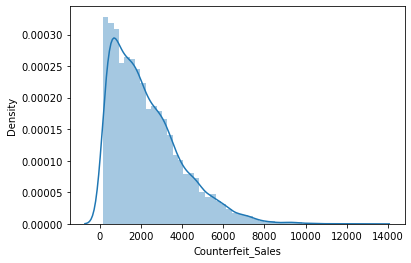

In [9]:
sns.distplot(train['Counterfeit_Sales'])

In [10]:
train['Counterfeit_Sales'].skew()

1.1820561465614312

In [11]:
train['Counterfeit_Sales'] = np.log(train['Counterfeit_Sales'])
train['Counterfeit_Sales'].skew()

-0.5558234795181309

C:\Users\anvay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Counterfeit_Sales', ylabel='Density'>

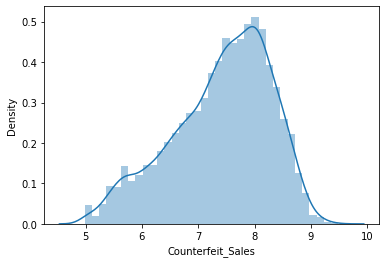

In [12]:
sns.distplot(train['Counterfeit_Sales'])

<AxesSubplot:xlabel='Counterfeit_Sales'>

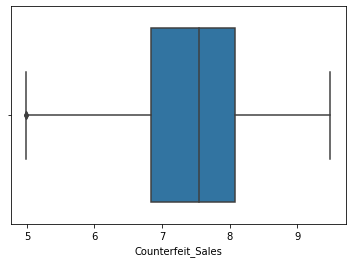

In [13]:
sns.boxplot(x=train['Counterfeit_Sales'])

In [14]:
test['Counterfeit_Sales']= np.nan

In [15]:
train.shape , test.shape

((6818, 12), (1705, 12))

In [16]:
train['data']='train'
test['data']='test'

In [17]:
train.shape , test.shape

((6818, 13), (1705, 13))

In [18]:
test=test[train.columns]

In [21]:
complete=pd.concat([train,test], axis=0)

In [22]:
complete

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,7.481839,train
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,8.029157,train
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,7.864455,train
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,7.004622,train
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,5.068528,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,KXW10,NaN,Area027,1983,136.5704,Hreplacements,mild,0.050505,CityLimits,Tier 3,Medium,NaN,test
1701,CKE54,21.300,Area035,2002,57.0744,Antibiotics,critical,0.041118,DownTown,Tier 2,Small,NaN,test
1702,HAY13,20.400,Area017,2005,182.7422,Antiseptics,mild,0.191273,DownTown,Tier 2,Unknown,NaN,test
1703,ZEE32,20.000,Area018,2007,266.9672,Hreplacements,mild,0.013000,Industrial,Tier 3,Medium,NaN,test


<AxesSubplot:>

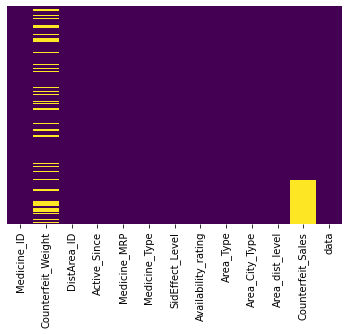

In [24]:
sns.heatmap(complete.isnull(), yticklabels= False, cbar= False, cmap= 'viridis')

In [25]:
complete.isnull().sum()/complete.shape[0] *100

Medicine_ID             0.000000
Counterfeit_Weight     17.165317
DistArea_ID             0.000000
Active_Since            0.000000
Medicine_MRP            0.000000
Medicine_Type           0.000000
SidEffect_Level         0.000000
Availability_rating     0.000000
Area_Type               0.000000
Area_City_Type          0.000000
Area_dist_level         0.000000
Counterfeit_Sales      20.004693
data                    0.000000
dtype: float64

In [26]:
complete.dtypes

Medicine_ID             object
Counterfeit_Weight     float64
DistArea_ID             object
Active_Since             int64
Medicine_MRP           float64
Medicine_Type           object
SidEffect_Level         object
Availability_rating    float64
Area_Type               object
Area_City_Type          object
Area_dist_level         object
Counterfeit_Sales      float64
data                    object
dtype: object

In [27]:
complete['DistArea_ID'].value_counts()

Area027    935
Area013    932
Area046    930
Area035    930
Area049    930
Area045    929
Area018    928
Area017    926
Area010    555
Area019    528
Name: DistArea_ID, dtype: int64

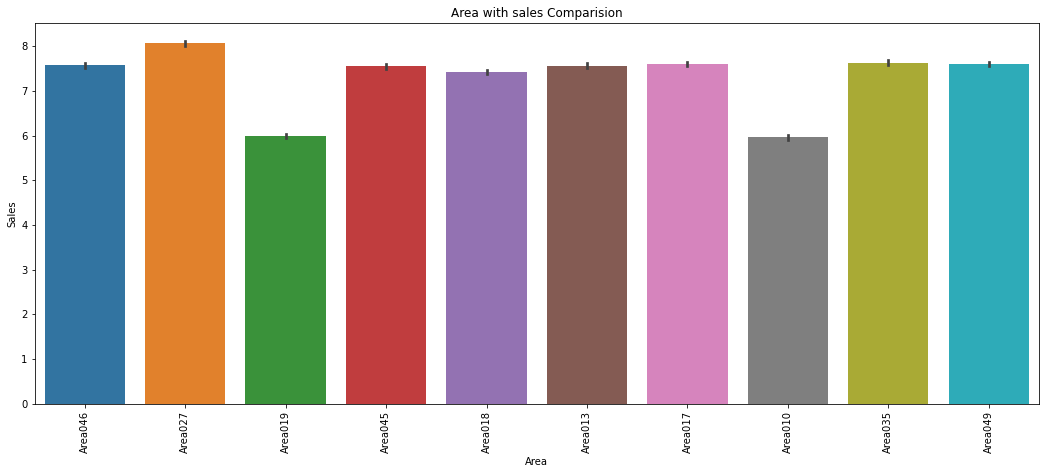

In [28]:
plt.figure(figsize=(18,7))
sns.barplot(x='DistArea_ID',y='Counterfeit_Sales',data=complete)
plt.title('Area with sales Comparision')
plt.xlabel('Area')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

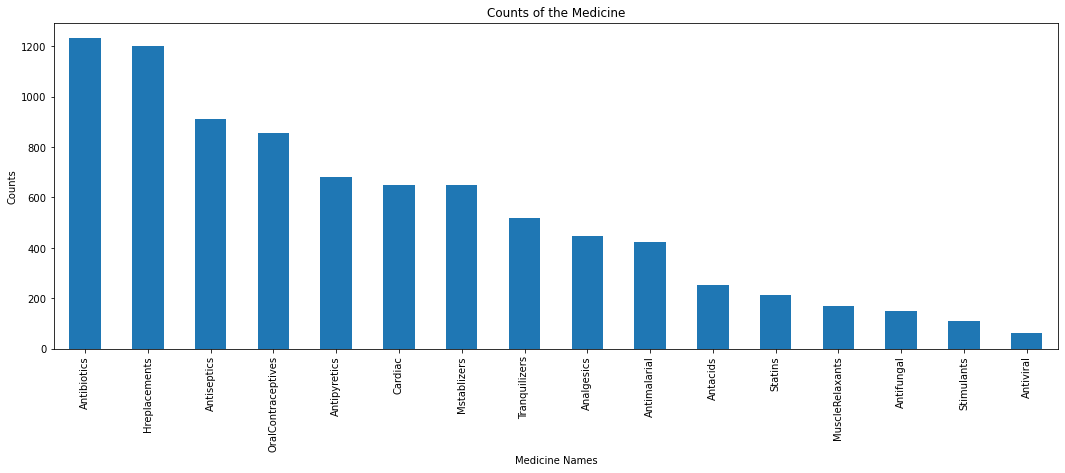

In [29]:
complete['Medicine_Type'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(18,6))
plt.xlabel('Medicine Names')
plt.ylabel('Counts')
plt.title('Counts of the Medicine')
plt.show()

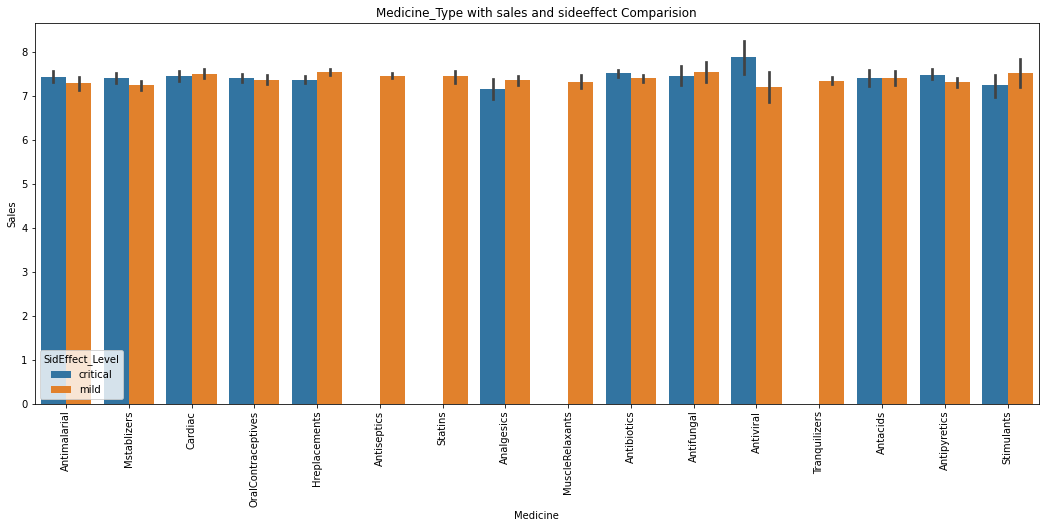

In [30]:
plt.figure(figsize=(18,7))
sns.barplot(x='Medicine_Type',y='Counterfeit_Sales', hue='SidEcomplete_trainect_Level',data=complete)
plt.title('Medicine_Type with sales and sideecomplete_trainect Comparision')
plt.xlabel('Medicine')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

In [31]:
complete.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'Counterfeit_Sales', 'data'],
      dtype='object')

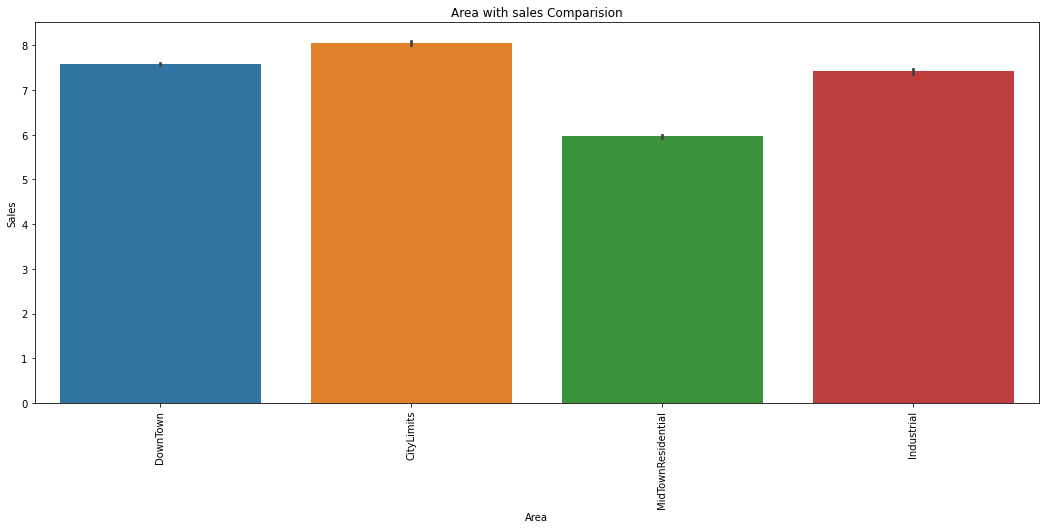

In [32]:
plt.figure(figsize=(18,7))
sns.barplot(x='Area_Type',y='Counterfeit_Sales',data=complete)
plt.title('Area with sales Comparision')
plt.xlabel('Area')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

In [33]:
complete['current_year']=2021

In [34]:
complete['no_of_years_active']=complete['current_year']-complete['Active_Since']

In [35]:
complete

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data,current_year,no_of_years_active
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,7.481839,train,2021,26
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,8.029157,train,2021,38
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,7.864455,train,2021,26
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,7.004622,train,2021,26
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,5.068528,train,2021,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,KXW10,NaN,Area027,1983,136.5704,Hreplacements,mild,0.050505,CityLimits,Tier 3,Medium,NaN,test,2021,38
1701,CKE54,21.300,Area035,2002,57.0744,Antibiotics,critical,0.041118,DownTown,Tier 2,Small,NaN,test,2021,19
1702,HAY13,20.400,Area017,2005,182.7422,Antiseptics,mild,0.191273,DownTown,Tier 2,Unknown,NaN,test,2021,16
1703,ZEE32,20.000,Area018,2007,266.9672,Hreplacements,mild,0.013000,Industrial,Tier 3,Medium,NaN,test,2021,14


In [36]:
complete= complete.drop(['Active_Since','current_year'], axis=1)

In [37]:
complete.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Medicine_MRP',
       'Medicine_Type', 'SidEffect_Level', 'Availability_rating', 'Area_Type',
       'Area_City_Type', 'Area_dist_level', 'Counterfeit_Sales', 'data',
       'no_of_years_active'],
      dtype='object')

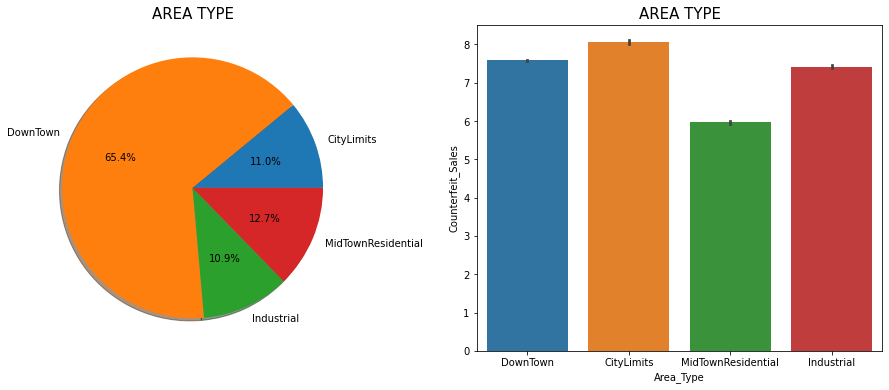

In [39]:
fig, ax=plt.subplots(1,2, figsize=(16,6))
complete['Area_Type'].value_counts().sort_index().plot.pie(explode=[0,0,0,0],
                                                          autopct='%1.1f%%', shadow=True, ax=ax[0])
ax[0].set_title('AREA TYPE', fontsize=15)
ax[0].set_ylabel(' ')
sns.barplot(x='Area_Type',y='Counterfeit_Sales',data=complete, ax=ax[1])
ax[1].set_title('AREA TYPE', fontsize=15)
plt.show()

In [40]:
complete

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data,no_of_years_active
0,RRA15,13.100,Area046,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,7.481839,train,26
1,YVV26,NaN,Area027,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,8.029157,train,38
2,LJC15,9.025,Area046,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,7.864455,train,26
3,GWC40,11.800,Area046,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,7.004622,train,26
4,QMN13,NaN,Area019,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,5.068528,train,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,KXW10,NaN,Area027,136.5704,Hreplacements,mild,0.050505,CityLimits,Tier 3,Medium,NaN,test,38
1701,CKE54,21.300,Area035,57.0744,Antibiotics,critical,0.041118,DownTown,Tier 2,Small,NaN,test,19
1702,HAY13,20.400,Area017,182.7422,Antiseptics,mild,0.191273,DownTown,Tier 2,Unknown,NaN,test,16
1703,ZEE32,20.000,Area018,266.9672,Hreplacements,mild,0.013000,Industrial,Tier 3,Medium,NaN,test,14


In [41]:
complete['Counterfeit_Weight'].value_counts()

13.450    86
18.900    82
14.950    77
13.100    76
16.400    68
          ..
8.195      2
10.720     1
7.820      1
6.700      1
8.985      1
Name: Counterfeit_Weight, Length: 415, dtype: int64

In [42]:
complete['Counterfeit_Weight']= complete['Counterfeit_Weight'].fillna((complete['Counterfeit_Weight'].mean()))

In [43]:
complete.isnull().sum()


Medicine_ID               0
Counterfeit_Weight        0
DistArea_ID               0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales      1705
data                      0
no_of_years_active        0
dtype: int64

In [44]:
complete['Availability_rating']

0       0.070422
1       0.013000
2       0.060783
3       0.065555
4       0.248859
          ...   
1700    0.050505
1701    0.041118
1702    0.191273
1703    0.013000
1704    0.098982
Name: Availability_rating, Length: 8523, dtype: float64

In [45]:
from sklearn.preprocessing import KBinsDiscretizer

availability_disctriz = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='quantile')
complete['Availability_rating_bins'] = availability_disctriz.fit_transform(complete['Availability_rating'].values.reshape(-1,1)).astype(int)


In [46]:
complete['Availability_rating_bins']

0       4
1       0
2       3
3       3
4       7
       ..
1700    2
1701    2
1702    7
1703    0
1704    5
Name: Availability_rating_bins, Length: 8523, dtype: int32

In [47]:
cols_to_disc      = ['Counterfeit_Weight','Medicine_MRP']
cols_to_disc_bins = ['Counterfeit_Weight_bins','Medicine_MRP_bins']
disctriz = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='quantile')
complete[cols_to_disc_bins] = complete[cols_to_disc]
complete[cols_to_disc_bins] = disctriz.fit_transform(complete[cols_to_disc]).astype(int)

In [48]:
complete

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data,no_of_years_active,Availability_rating_bins,Counterfeit_Weight_bins,Medicine_MRP_bins
0,RRA15,13.100000,Area046,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,7.481839,train,26,4,2,4
1,YVV26,14.157645,Area027,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,8.029157,train,38,0,4,2
2,LJC15,9.025000,Area046,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,7.864455,train,26,3,1,7
3,GWC40,11.800000,Area046,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,7.004622,train,26,3,2,1
4,QMN13,14.157645,Area019,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,5.068528,train,38,7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,KXW10,14.157645,Area027,136.5704,Hreplacements,mild,0.050505,CityLimits,Tier 3,Medium,NaN,test,38,2,4,3
1701,CKE54,21.300000,Area035,57.0744,Antibiotics,critical,0.041118,DownTown,Tier 2,Small,NaN,test,19,2,7,0
1702,HAY13,20.400000,Area017,182.7422,Antiseptics,mild,0.191273,DownTown,Tier 2,Unknown,NaN,test,16,7,7,5
1703,ZEE32,20.000000,Area018,266.9672,Hreplacements,mild,0.013000,Industrial,Tier 3,Medium,NaN,test,14,0,7,7


In [49]:
complete= complete.drop(['Availability_rating','Counterfeit_Weight','Medicine_MRP'], axis=1)

In [50]:
complete

,Medicine_ID,DistArea_ID,Medicine_Type,SidEffect_Level,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data,no_of_years_active,Availability_rating_bins,Counterfeit_Weight_bins,Medicine_MRP_bins
0,RRA15,Area046,Antimalarial,critical,DownTown,Tier 1,Small,7.481839,train,26,4,2,4
1,YVV26,Area027,Mstablizers,mild,CityLimits,Tier 3,Medium,8.029157,train,38,0,4,2
2,LJC15,Area046,Cardiac,mild,DownTown,Tier 1,Small,7.864455,train,26,3,1,7
3,GWC40,Area046,OralContraceptives,mild,DownTown,Tier 1,Small,7.004622,train,26,3,2,1
4,QMN13,Area019,Hreplacements,critical,MidTownResidential,Tier 1,Small,5.068528,train,38,7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,KXW10,Area027,Hreplacements,mild,CityLimits,Tier 3,Medium,NaN,test,38,2,4,3
1701,CKE54,Area035,Antibiotics,critical,DownTown,Tier 2,Small,NaN,test,19,2,7,0
1702,HAY13,Area017,Antiseptics,mild,DownTown,Tier 2,Unknown,NaN,test,16,7,7,5
1703,ZEE32,Area018,Hreplacements,mild,Industrial,Tier 3,Medium,NaN,test,14,0,7,7


In [51]:
complete.dtypes

Medicine_ID                  object
DistArea_ID                  object
Medicine_Type                object
SidEffect_Level              object
Area_Type                    object
Area_City_Type               object
Area_dist_level              object
Counterfeit_Sales           float64
data                         object
no_of_years_active            int64
Availability_rating_bins      int32
Counterfeit_Weight_bins       int32
Medicine_MRP_bins             int32
dtype: object

In [52]:
complete['Area_dist_level'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Area_dist_level, dtype: int64

In [53]:
dictionary = {'Small':0,'Medium':1,'High':2,'Unknown':3,}
complete['Area_dist_level'] = complete['Area_dist_level'].map(dictionary)

In [54]:
complete['Area_dist_level'].value_counts()

1    2793
3    2410
0    2388
2     932
Name: Area_dist_level, dtype: int64

In [55]:
complete['Area_Type'].value_counts()

DownTown              5577
MidTownResidential    1083
CityLimits             935
Industrial             928
Name: Area_Type, dtype: int64

In [56]:
complete['Area_City_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Area_City_Type, dtype: int64

In [57]:
dictionary2 = {'Tier 1':0,'Tier 2':1,'Tier 3':2}
complete['Area_City_Type'] = complete['Area_City_Type'].map(dictionary2)

In [58]:
complete['Area_City_Type'].value_counts()

2    3350
1    2785
0    2388
Name: Area_City_Type, dtype: int64

In [59]:
complete['SidEcomplete_trainect_Level'].value_counts()

mild        5517
critical    3006
Name: SidEffect_Level, dtype: int64

In [60]:
dictionary3 = {'mild':0,'critical':1}
complete['SidEcomplete_trainect_Level'] = complete['SidEcomplete_trainect_Level'].map(dictionary3)

In [61]:
complete['SidEcomplete_trainect_Level'].value_counts()

0    5517
1    3006
Name: SidEffect_Level, dtype: int64

In [62]:
complete.select_dtypes('O')

,Medicine_ID,DistArea_ID,Medicine_Type,Area_Type,data
0,RRA15,Area046,Antimalarial,DownTown,train
1,YVV26,Area027,Mstablizers,CityLimits,train
2,LJC15,Area046,Cardiac,DownTown,train
3,GWC40,Area046,OralContraceptives,DownTown,train
4,QMN13,Area019,Hreplacements,MidTownResidential,train
...,...,...,...,...,...
1700,KXW10,Area027,Hreplacements,CityLimits,test
1701,CKE54,Area035,Antibiotics,DownTown,test
1702,HAY13,Area017,Antiseptics,DownTown,test
1703,ZEE32,Area018,Hreplacements,Industrial,test


In [63]:
complete['DistArea_ID'].value_counts()

Area027    935
Area013    932
Area046    930
Area035    930
Area049    930
Area045    929
Area018    928
Area017    926
Area010    555
Area019    528
Name: DistArea_ID, dtype: int64

In [64]:
complete= complete.drop('Medicine_ID', axis=1)

In [65]:
def dummies(x,df):
    temp=pd.get_dummies(df[x],drop_first=True)
    df=pd.concat([df,temp],axis=1)
    df.drop([x],axis=1,inplace=True)
    return df

In [66]:
complete = dummies('DistArea_ID',complete)
complete = dummies('Medicine_Type',complete)
complete = dummies('Area_Type',complete)

In [67]:
complete

,SidEffect_Level,Area_City_Type,Area_dist_level,Counterfeit_Sales,data,no_of_years_active,Availability_rating_bins,Counterfeit_Weight_bins,Medicine_MRP_bins,Area013,...,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,DownTown,Industrial,MidTownResidential
0,1,0,0,7.481839,train,26,4,2,4,0,...,0,0,0,0,0,0,0,1,0,0
1,0,2,1,8.029157,train,38,0,4,2,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,7.864455,train,26,3,1,7,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,7.004622,train,26,3,2,1,0,...,0,0,0,1,0,0,0,1,0,0
4,1,0,0,5.068528,train,38,7,4,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,0,2,1,NaN,test,38,2,4,3,0,...,1,0,0,0,0,0,0,0,0,0
1701,1,1,0,NaN,test,19,2,7,0,0,...,0,0,0,0,0,0,0,1,0,0
1702,0,1,3,NaN,test,16,7,7,5,0,...,0,0,0,0,0,0,0,1,0,0
1703,0,2,1,NaN,test,14,0,7,7,0,...,1,0,0,0,0,0,0,0,1,0


In [70]:
complete_train = complete[complete['data'] == 'train']
complete_test  = complete[complete['data'] == 'test']

In [71]:
del complete_train['data']
del complete_test['data']
del complete_test['Counterfeit_Sales']

In [72]:
del complete

In [73]:
complete_train

,SidEffect_Level,Area_City_Type,Area_dist_level,Counterfeit_Sales,no_of_years_active,Availability_rating_bins,Counterfeit_Weight_bins,Medicine_MRP_bins,Area013,Area017,...,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,DownTown,Industrial,MidTownResidential
0,1,0,0,7.481839,26,4,2,4,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,2,1,8.029157,38,0,4,2,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,7.864455,26,3,1,7,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,7.004622,26,3,2,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,0,0,5.068528,38,7,4,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,0,0,0,7.635522,26,6,0,6,0,0,...,1,0,0,0,0,0,0,1,0,0
6814,0,0,0,7.662176,26,6,7,7,0,0,...,1,0,0,0,0,0,0,1,0,0
6815,1,1,3,7.659040,16,5,7,5,0,1,...,0,0,0,0,0,0,0,1,0,0
6816,0,1,3,7.303314,21,5,1,4,0,0,...,0,0,0,0,1,0,0,1,0,0


In [74]:
complete_test

,SidEffect_Level,Area_City_Type,Area_dist_level,no_of_years_active,Availability_rating_bins,Counterfeit_Weight_bins,Medicine_MRP_bins,Area013,Area017,Area018,...,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,DownTown,Industrial,MidTownResidential
0,0,2,1,38,6,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,3,21,7,3,7,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,1,3,21,7,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,2,3,25,5,6,3,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,38,0,4,2,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,0,2,1,38,2,4,3,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1701,1,1,0,19,2,7,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1702,0,1,3,16,7,7,5,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1703,0,2,1,14,0,7,7,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [75]:
complete_test.columns

Index(['SidEffect_Level', 'Area_City_Type', 'Area_dist_level',
       'no_of_years_active', 'Availability_rating_bins',
       'Counterfeit_Weight_bins', 'Medicine_MRP_bins', 'Area013', 'Area017',
       'Area018', 'Area019', 'Area027', 'Area035', 'Area045', 'Area046',
       'Area049', 'Antacids', 'Antibiotics', 'Antifungal', 'Antimalarial',
       'Antipyretics', 'Antiseptics', 'Antiviral', 'Cardiac', 'Hreplacements',
       'Mstablizers', 'MuscleRelaxants', 'OralContraceptives', 'Statins',
       'Stimulants', 'Tranquilizers', 'DownTown', 'Industrial',
       'MidTownResidential'],
      dtype='object')

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

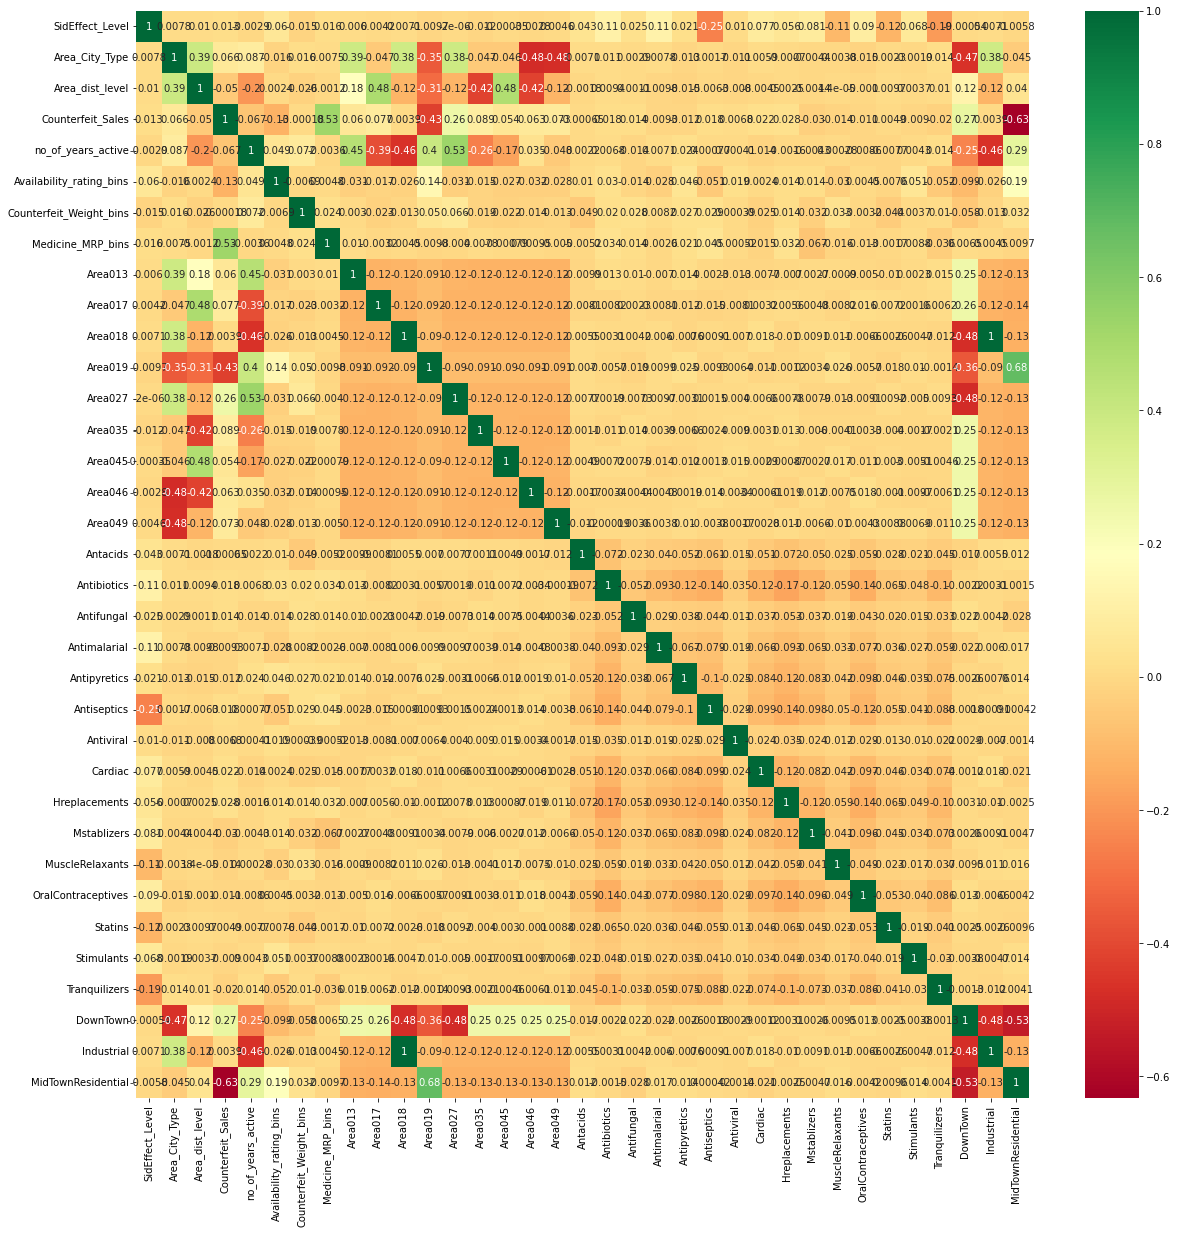

In [77]:

plt.figure(figsize = (20,20))
sns.heatmap(complete_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [78]:
complete_train= complete_train.drop('Counterfeit_Weight_bins', axis=1)

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
train_feau=complete_train.drop('Counterfeit_Sales', axis=1)
train_tar=complete_train['Counterfeit_Sales']

In [96]:
X_train,X_test,y_train,y_test=train_test_split(train_feau,train_tar,test_size=0.20,random_state=0)


In [97]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5454, 33) (1364, 33) (5454,) (1364,)


In [98]:
y_train

1524    6.557106
2818    7.562149
1957    8.674117
5019    8.207503
4442    8.371209
          ...   
4931    8.676845
3264    5.665635
1653    7.323286
2607    7.273281
2732    7.180910
Name: Counterfeit_Sales, Length: 5454, dtype: float64

### Scaling the Data

In [99]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


In [100]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Linear Regression

In [101]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(X_train,y_train)

X_pred=lm.predict(X_train)

y_pred=lm.predict(X_test)

lm.score(X_test,y_test)

training_score = lm.score(X_train,y_train)
print('training_score_acc :',training_score)

mean_abs_score_train=mean_absolute_error(y_train,X_pred)
print('mean_abs_score_train :', mean_abs_score_train)

testing_score = lm.score(X_test,y_test)
print('testing_score_acc :',testing_score)

mean_abs_score_test=mean_absolute_error(y_test,y_pred)
print('mean_abs_score_test :', mean_abs_score_test)


r2score = r2_score(y_test,y_pred)
print('R2 score:',r2score)

training_score_acc : 0.707597181843685
mean_abs_score_train : 0.3723179732600396
testing_score_acc : 0.7080543092972265
mean_abs_score_test : 0.3648349929142328
R2 score: 0.7080543092972265


## Random forest Regressor

In [102]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(criterion='mae')

model.fit(X_train,y_train)

X_pred=model.predict(X_train)

y_pred2=model.predict(X_test)

training_score = model.score(X_train,y_train)
print('training_score_acc :',training_score)


mean_abs_score_train=mean_absolute_error(y_train,X_pred)
print('mean_abs_score_train :', mean_abs_score_train)


testing_score = model.score(X_test,y_test)
print('testing_score_acc :',testing_score)


mean_abs_score_test=mean_absolute_error(y_test,y_pred2)
print('mean_abs_score_test :', mean_abs_score_test)

r2score = r2_score(y_test,y_pred2)
print(r2score)



C:\Users\anvay\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


training_score_acc : 0.9091594383986252
mean_abs_score_train : 0.1976973163379856
testing_score_acc : 0.6470608360759991
mean_abs_score_test : 0.4009633488215014
0.6470608360759991


In [103]:
data1 = {'Feature_Name':train_feau.columns, 'Feature_Importance':model.feature_importances_}

feat_imp = pd.DataFrame(data1).sort_values(by='Feature_Importance', ascending=False)
feat_imp

,Feature_Name,Feature_Importance
5,Medicine_MRP_bins,0.274514
32,MidTownResidential,0.248521
4,Availability_rating_bins,0.133918
0,SidEffect_Level,0.038830
3,no_of_years_active,0.035089
23,Hreplacements,0.019980
16,Antibiotics,0.018818
20,Antiseptics,0.016792
26,OralContraceptives,0.016755
10,Area027,0.016327


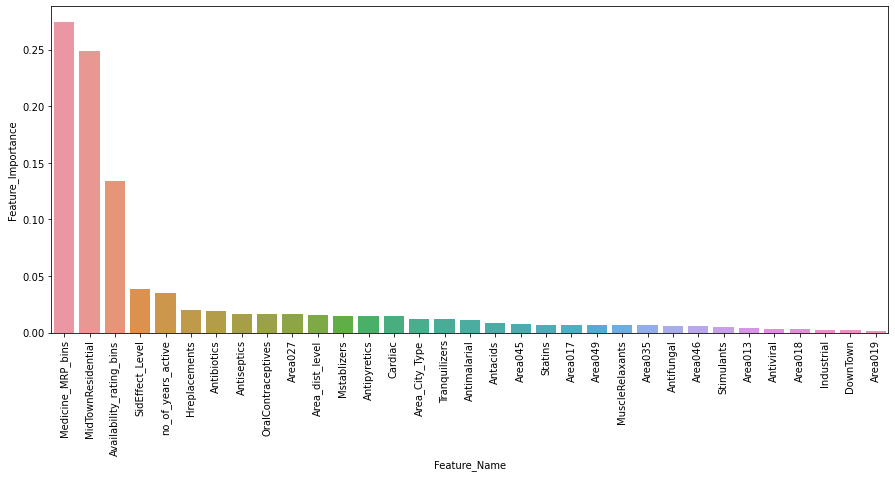

In [104]:
plt.figure(figsize=(15,6))
sns.barplot(data=feat_imp, x='Feature_Name', y='Feature_Importance')
plt.xticks(rotation=90)
plt.show()

## Extra trees Regressor

In [105]:
from sklearn.ensemble import ExtraTreesRegressor
ex_tree = ExtraTreesRegressor()

ex_tree.fit(X_train, y_train)

X_pred4=ex_tree.predict(X_train)

y_pred4=ex_tree.predict(X_test)

mean_abs_score_train=mean_absolute_error(y_train,X_pred4)
mean_abs_score_train

r2score = r2_score(y_test,y_pred4)
print(r2score)

mean_abs_score_test=mean_absolute_error(y_test,y_pred4)
mean_abs_score_test

0.53340867463389


0.46278104650877533

### XGBOOST Regressor

In [106]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import xgboost as xg

from xgboost import XGBRegressor

xgb = xg.XGBRegressor()

### without hyperparameter tuning

xgb.fit(X_train,y_train)

X_pred3=xgb.predict(X_train)

predictions = xgb.predict(X_test)

training_score = xgb.score(X_train,y_train)
training_score

testing_score = xgb.score(X_test,y_test)
testing_score

mean_abs_score_train=mean_absolute_error(y_train,X_pred3)
print('mean_abs_score_train :', mean_abs_score_train)



mean_abs_score_test=mean_absolute_error(y_test,predictions)
print('mean_abs_score_test :', mean_abs_score_test)

r2score = r2_score(y_test,predictions)
print(r2score)

mean_abs_score_train : 0.26771384215886423
mean_abs_score_test : 0.39059608243956223
0.6610274318670417


### With Hyperparamter tunning

In [107]:
param_test_xgb = {
 'max_depth'       :[4,5,6],
 'min_child_weight':[0,1,2],
 'gamma'           :[0, 0.1,0.2],
 'reg_alpha'       :[0.1, 0.01, 0.05],
 'reg_lambda'      :[0.1, 0.01, 0.05],
 'colsample_bytree'  :[0.7],
 'learning_rate'     : [.03, 0.02, 0.01],
 'n_estimators'   : [700,850,1000]
}

xgb_rs = RandomizedSearchCV(xgb, param_distributions=param_test_xgb, cv=5, n_iter=10, scoring='neg_mean_absolute_error')

xgb_rs.fit(X_train,y_train)


X_pred5=xgb_rs.predict(X_train)

y_pred5 = xgb_rs.predict(X_test)

training_score = xgb_rs.score(X_train,y_train)
training_score

testing_score = xgb_rs.score(X_test,y_test)
testing_score

mean_abs_score_train=mean_absolute_error(y_train,X_pred5)
print('mean_abs_score_train :', mean_abs_score_train)

mean_square_error_score_train= mean_squared_error(y_train,X_pred5)
print('mean_square_error_score_train :', mean_square_error_score_train)


mean_abs_score_test=mean_absolute_error(y_test,y_pred5)
print('mean_abs_score_test :', mean_abs_score_test)

mean_square_error_score_test= mean_squared_error(y_test,y_pred5)
print('mean_square_error_score_test :', mean_square_error_score_test)

r2score = r2_score(y_test,y_pred5)
print('R2 score:',r2score)
  

mean_abs_score_train : 0.35132292284753586
mean_square_error_score_train : 0.2028626114722233
mean_abs_score_test : 0.35298015611308836
mean_square_error_score_test : 0.2099773159002345
R2 score: 0.7183925191435533


In [95]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
xgb_rs = RandomizedSearchCV(xgb, param_distributions=params, cv=5, n_iter=10, scoring='neg_mean_absolute_error')

xgb_rs.fit(X_train,y_train)


X_pred5=xgb_rs.predict(X_train)

y_pred5 = xgb_rs.predict(X_test)

training_score = xgb_rs.score(X_train,y_train)
training_score

testing_score = xgb_rs.score(X_test,y_test)
testing_score

mean_abs_score_train=mean_absolute_error(y_train,X_pred5)
print('mean_abs_score_train :', mean_abs_score_train)


mean_abs_score_test=mean_absolute_error(y_test,y_pred5)
print('mean_abs_score_test :', mean_abs_score_test)

r2score = r2_score(y_test,y_pred5)
print('R2 score:',r2score)
  

mean_abs_score_train : 0.3623689876908318
mean_abs_score_test : 0.34514438226692334
R2 score: 0.7256129773271018
